[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/royforestano/Deep_Learning_Symmetries/blob/main/Discovering_Sparse_Representations_of_Lie_Groups_with_Machine_Learning/sym_u_and_su_demo.ipynb)

# Discovering Sparse Representations of Lie Groups with Machine Learning - Demonstration

Author: Roy Forestano

Date of Completion: 18 February 2023

Connected to the paper on: Discovering Sparse Representations of Lie Groups with Machine Learning (arXiv:2302.05383: https://arxiv.org/abs/2302.05383)

This notebook will reproduce examples in the paper.

In [1]:
# !pip install torch

In [2]:
from sym_u_and_su_utils import *
%matplotlib inline

Using cpu device


In [3]:
# Define oracles and useful definitions
def oracle_norm(data): # L^2 Norm (includes imaginary) on X: sqrt(sum(|x_i|^2))
    return torch.norm(torch.abs(data),dim=1)

def oracle_complex_norm(data): # L^2 Norm (includes imaginary) on X: sqrt(sum(|x_i|^2))
    return linalg.vector_norm(data,dim=1)

def G2(data):
    return (c_tensor*torch.einsum('ij,ik,il->ijkl',data[:n//3],data[n//3:2*n//3],data[2*n//3:])).sum(dim=[1,2,3])

---

# $U(2)$ and $SU(2)$: Figure 3: $n_{dim} = 2, n_{gen} = 4,3$

## $U(2)$: $n_{dim} = 2, n_{gen} = 4$

Epoch 3000   |  Train Loss: 0.07849294082486023
Total Time: 129.81309795
Complete.


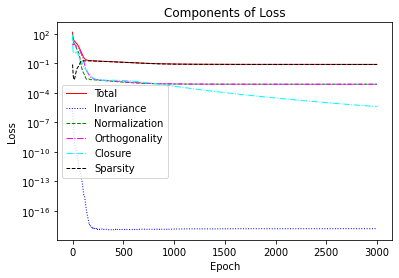

In [4]:
torch.manual_seed(0)
n       = 300   # sample size
n_dim   = 2     # dimension
n_gen   = 4     # N^2 for U(n) , N^2-1 for SU(n)
n_com   = int(n_gen*(n_gen-1)/2)  # N_g choose 2 of these
eps     = 1e-3
lr      = 5e-2
epochs  = 3000
oracle = oracle_complex_norm
include_sc = True

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

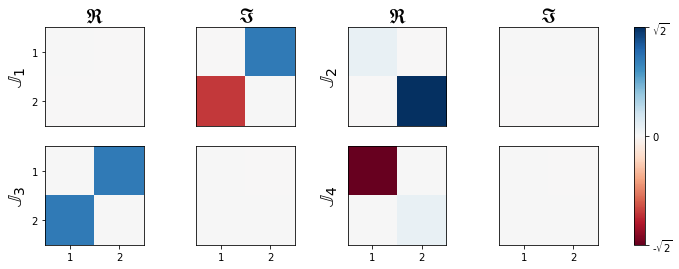

In [5]:
figsizeg = (13,4)
rows = 2
cols = 2*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

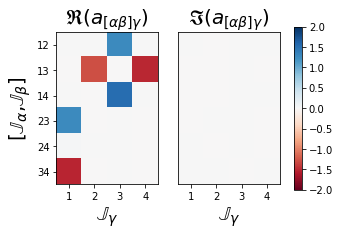

In [6]:
if n_gen>1 and include_sc:
    figsizec=(5,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [7]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [5.2620862e-06+8.0286576e-08j 3.5505451e-05-3.2488873e-07j
 1.2775799e+00+1.9488648e-07j 1.0723719e-02+2.3968919e-06j]
 
 C = 
  [[ 0.01327707-0.00274908j -1.2713718 +1.2963514j ]
 [-1.271369  +1.296359j   -0.0035208 +0.00275072j]] 

The structure constants were found with a mean absolute error (MAE) of 0.9123777151107788. 
 

13: 
 Structure Constants = [-1.4012754e-03-0.00100417j -1.2858500e+00-0.00044712j
 -2.1481365e-03+0.00400195j -1.5095160e+00-0.00168756j]
 
 C = 
  [[-1.9904932e+00+1.9782369j   7.6616067e-04-0.00221984j]
 [ 2.7625153e-03-0.00500158j  1.9752858e+00-1.9797697j ]] 

The structure constants were found with a mean absolute error (MAE) of 1.4027599096298218. 
 

14: 
 Structure Constants = [ 0.0043754 -0.00113227j -0.01248491-0.00305037j  1.5250564 +0.00286643j
  0.00400496+0.0028118j ]
 
 C = 
  [[ 0.00478792+0.00614127j -1.5187819 +1.5029091j ]
 [-1.5165248 +1.511614j    0.01440964+0.00213913j]] 

The structure constants were found with 

In [8]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.7854002714 rad, 45.0001207805 deg
Angle between generator 1 and 3: 1.0472513437 rad, 60.0030820850 deg
Angle between generator 1 and 4: 1.5703632832 rad, 89.9751884272 deg
Angle between generator 2 and 3: 0.7844300270 rad, 44.9445298709 deg
Angle between generator 2 and 4: 1.5691218376 rad, 89.9040588372 deg
Angle between generator 3 and 4: 0.7846917510 rad, 44.9595255512 deg


## $SU(2)$: $n_{dim} = 2, n_{gen} = 3$

Epoch 3000   |  Train Loss: 0.11719401363406944
Total Time: 69.10639691
Complete.


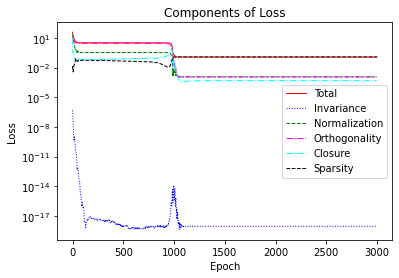

In [9]:
torch.manual_seed(1)
n       = 300
n_dim   = 2
n_gen   = 3
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 5e-2
epochs  = 3000
oracle = oracle_complex_norm
include_sc = True

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

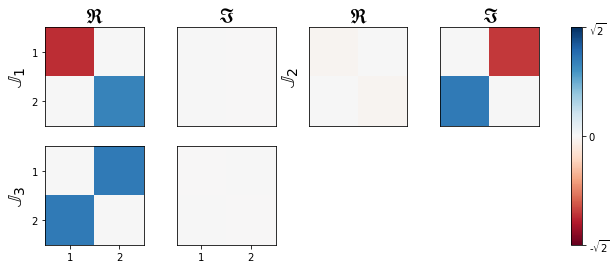

In [10]:
figsizeg = (13,4)
rows = 2
cols = 2*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

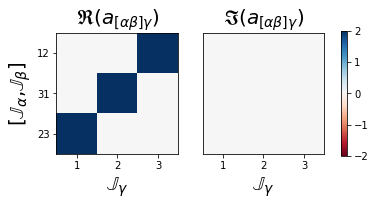

In [11]:
if n_gen>1 and include_sc:
    figsizec=(6,2.3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [12]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [1.6860664e-04+0.00019304j 2.8766394e-03-0.00055279j
 1.9861248e+00+0.00050582j]
 
 C = 
  [[ 2.7192227e-04+1.8432543e-04j -1.9758493e+00+1.9794271e+00j]
 [-1.9769499e+00+1.9737054e+00j -5.3133685e-05-2.0121936e-04j]] 

The structure constants were found with a mean absolute error (MAE) of 1.397719144821167. 
 

31: 
 Structure Constants = [-3.4433603e-04+1.4901161e-08j  1.9866807e+00+1.9092113e-08j
  2.3841858e-07+1.4901161e-08j]
 
 C = 
  [[ 0.06610305+2.0632017e-04j  1.9782472 +1.9757762e+00j]
 [-1.9782482 -1.9757762e+00j  0.07345671-2.0639971e-04j]] 

The structure constants were found with a mean absolute error (MAE) of 1.4328489303588867. 
 

23: 
 Structure Constants = [ 1.9863353e+00-1.0430813e-07j -3.4442544e-04+1.4901161e-08j
  4.6566129e-09+9.6857548e-08j]
 
 C = 
  [[ 2.07259   -1.9792835e+00j  0.00334038-1.3693112e-04j]
 [-0.00334047+1.3628943e-04j -1.87621   +1.9792838e+00j]] 

The structure constants were found with a mean absolute error (MAE)

In [13]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 1.5707962513 rad, 89.9999956743 deg
Angle between generator 1 and 3: 0.7853982449 rad, 45.0000046673 deg
Angle between generator 2 and 3: 1.0467103720 rad, 59.9720866865 deg


---

# $U(3)$ and $SU(3)$: Figure 4: $n_{dim} = 3, n_{gen} = 9,8$

## $U(3)$: $n_{dim} = 3, n_{gen} = 9$

Epoch 6000   |  Train Loss: 0.23850494314247997
Total Time: 1396.04180193
Complete.


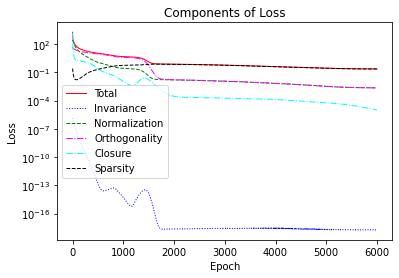

In [14]:
torch.manual_seed(0)
n       = 300
n_dim   = 3
n_gen   = 9
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-2
epochs  = 6000
oracle = oracle_complex_norm
include_sc = True

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc )

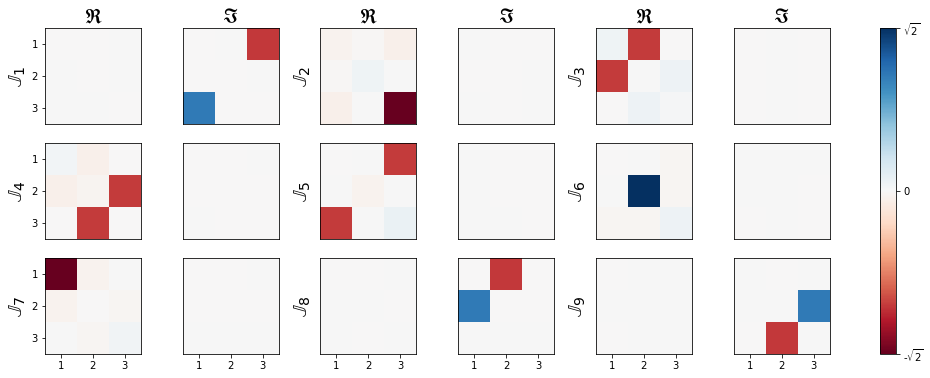

In [15]:
figsizeg = (18,6)
rows = 3
cols = 3*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred=gens_pred, rows=rows, cols=cols)

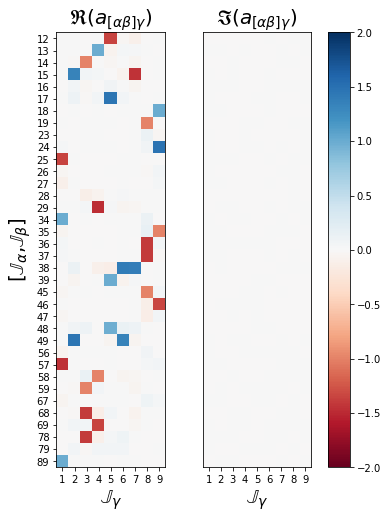

In [16]:
if n_gen>1 and include_sc:
    figsizec=(6,8)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [17]:
if n_gen>1 and include_sc and False:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [18]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.7915697694 rad, 45.3536069758 deg
Angle between generator 1 and 3: 1.0568476915 rad, 60.5529123132 deg
Angle between generator 1 and 4: 0.7878549695 rad, 45.1407646208 deg
Angle between generator 1 and 5: 2.0799062252 rad, 119.1698484872 deg
Angle between generator 1 and 6: 1.8155217171 rad, 104.0217320025 deg
Angle between generator 1 and 7: 1.5921262503 rad, 91.2221145923 deg
Angle between generator 1 and 8: 1.5637747049 rad, 89.5976907020 deg
Angle between generator 1 and 9: 2.0943799019 rad, 119.9991290751 deg
Angle between generator 2 and 3: 0.7010288239 rad, 40.1659929238 deg
Angle between generator 2 and 4: 0.0983698517 rad, 5.6361773342 deg
Angle between generator 2 and 5: 2.3779172897 rad, 136.2446247329 deg
Angle between generator 2 and 6: 1.9668090343 rad, 112.6898567763 deg
Angle between generator 2 and 7: 1.5275552273 rad, 87.5224674963 deg
Angle between generator 2 and 8: 1.6117199659 rad, 92.3447518050 deg
Angle between generator 2 and 

## $SU(3)$: $n_{dim} = 3, n_{gen} = 8$

Epoch 7000   |  Train Loss: 0.30416397787008864
Total Time: 907.88003516
Complete.


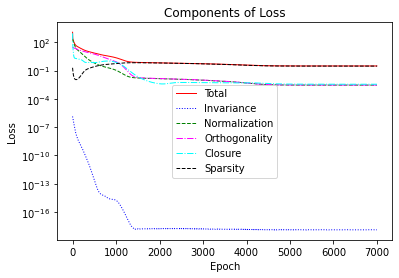

In [19]:
torch.manual_seed(0)
n       = 300
n_dim   = 3
n_gen   = 8
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-2
epochs  = 7000
oracle = oracle_complex_norm
include_sc = True

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

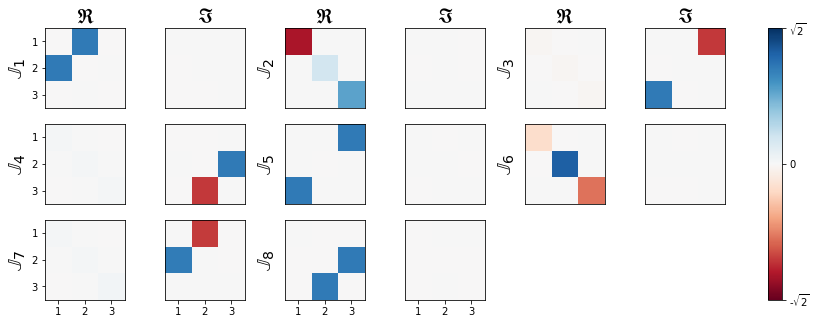

In [20]:
figsizeg = (18,5)
rows = 3
cols = 3*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)
plt.savefig('SU3.png',bbox_inches='tight')

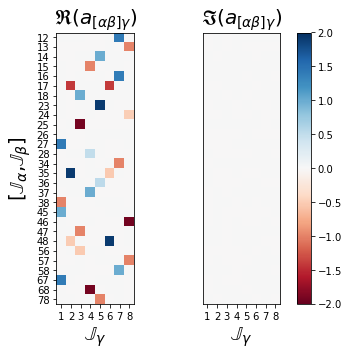

In [21]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)
    plt.savefig('SU3_sc.png',bbox_inches='tight')

In [22]:
if n_gen>1 and include_sc and False:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [23]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.0008457280 rad, 0.0484566437 deg
Angle between generator 1 and 3: 0.7842911482 rad, 44.9365727005 deg
Angle between generator 1 and 4: 1.5709760189 rad, 90.0102955996 deg
Angle between generator 1 and 5: 0.7853908539 rad, 44.9995811956 deg
Angle between generator 1 and 6: 1.5697884560 rad, 89.9422532550 deg
Angle between generator 1 and 7: 0.0000000000 rad, 0.0000000000 deg
Angle between generator 1 and 8: 1.5707818270 rad, 89.9991692214 deg
Angle between generator 2 and 3: 0.7844318151 rad, 44.9446323237 deg
Angle between generator 2 and 4: 1.5708855391 rad, 90.0051114860 deg
Angle between generator 2 and 5: 0.7853004932 rad, 44.9944039122 deg
Angle between generator 2 and 6: 1.5696977377 rad, 89.9370554811 deg
Angle between generator 2 and 7: 0.0009765625 rad, 0.0559529097 deg
Angle between generator 2 and 8: 1.5706912279 rad, 89.9939782776 deg
Angle between generator 3 and 4: 1.5708851814 rad, 90.0050909954 deg
Angle between generator 3 and 5: 1.04

---

# $U(4)$ and $SU(4)$: Figure 5: $n_{dim} = 4, n_{gen} = 16,15$

## $U(4)$: $n_{dim} = 4, n_{gen} = 16$

Epoch 7500   |  Train Loss: 0.47074006305232885
Total Time: 2644.33955002
Complete.


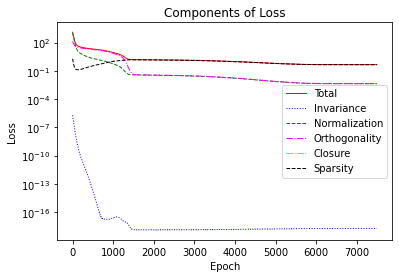

In [24]:
torch.manual_seed(0)
n       = 300
n_dim   = 4
n_gen   = 16
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 5e-3
epochs  = 7500
oracle  = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

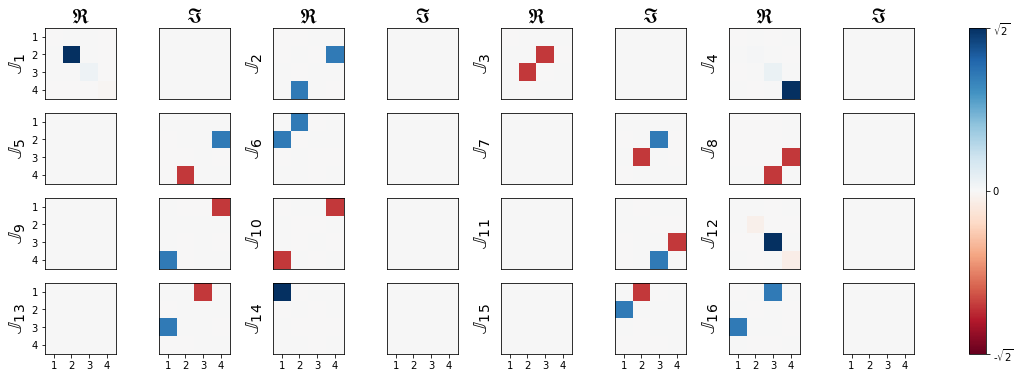

In [25]:
figsizeg = (20,6)
rows = 4
cols = 4*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [26]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [27]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [28]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)

## $SU(4)$: $n_{dim} = 4, n_{gen} = 15$

Epoch 7500   |  Train Loss: 0.40729627616749184
Total Time: 5008.17862511
Complete.


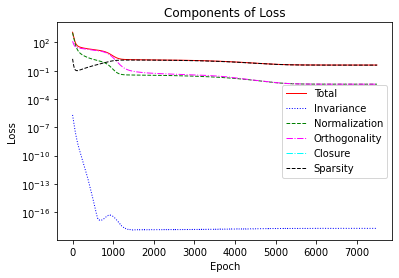

In [29]:
torch.manual_seed(1)
n       = 300
n_dim   = 4
n_gen   = 15
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 5e-3
epochs  = 7500
oracle = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

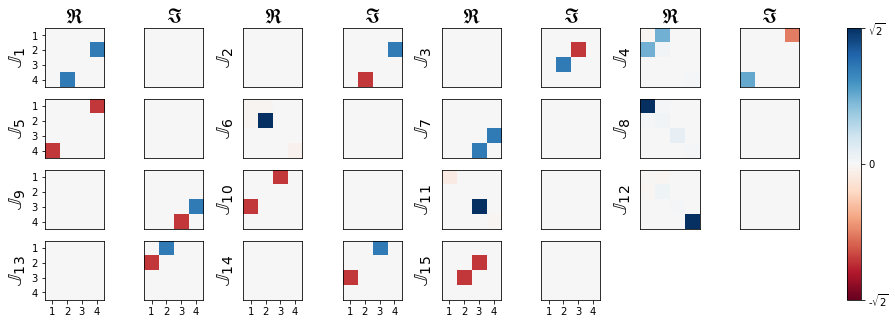

In [30]:
figsizeg = (20,5)
rows = 4
cols = 4*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [31]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [32]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [33]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)

---

# $U(5)$ and $SU(5)$: Figure 6: $n_{dim} = 5, n_{gen} = 25,24$

## $U(5)$: $n_{dim} = 5, n_{gen} = 25$

Epoch 15000   |  Train Loss: 0.7852405316607246
Total Time: 11819.78935218
Complete.


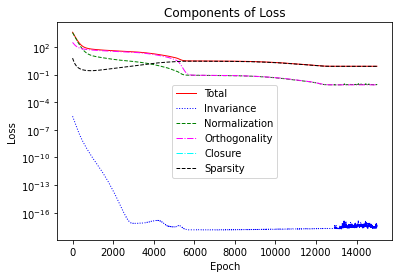

In [55]:
torch.manual_seed(0)
n       = 300
n_dim   = 5
n_gen   = 25
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 12000
oracle  = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

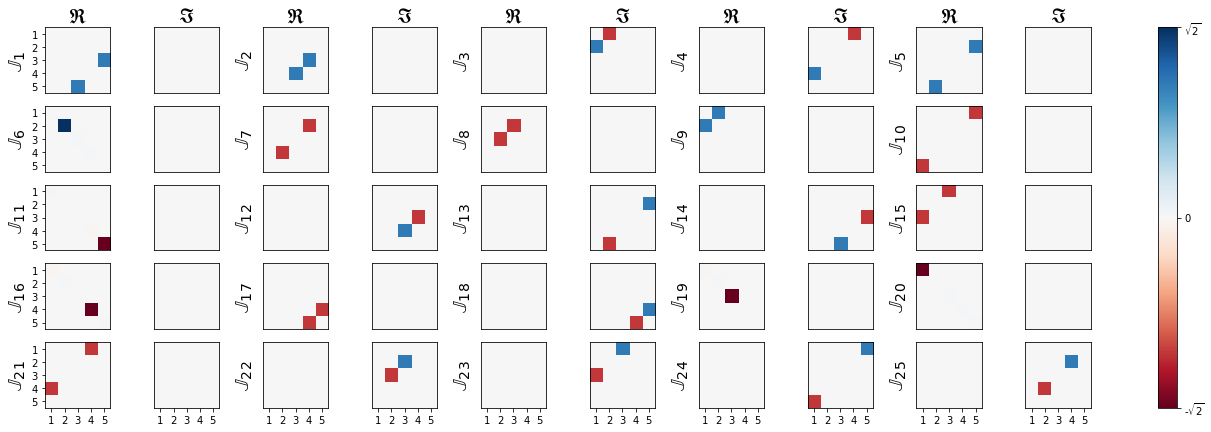

In [56]:
figsizeg = (24,7)
rows = 5
cols = 5*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [57]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [58]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [59]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)

## $SU(5)$: $n_{dim} = 5, n_{gen} = 24$

Epoch 15000   |  Train Loss: 0.7214374076339474
Total Time: 10473.49228907
Complete.


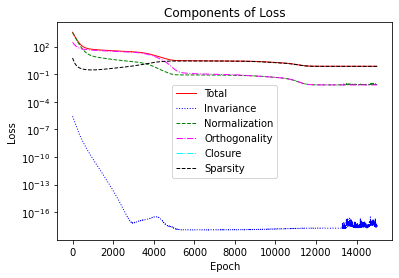

In [60]:
torch.manual_seed(0)
n       = 300
n_dim   = 5
n_gen   = 24
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 12500
oracle = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

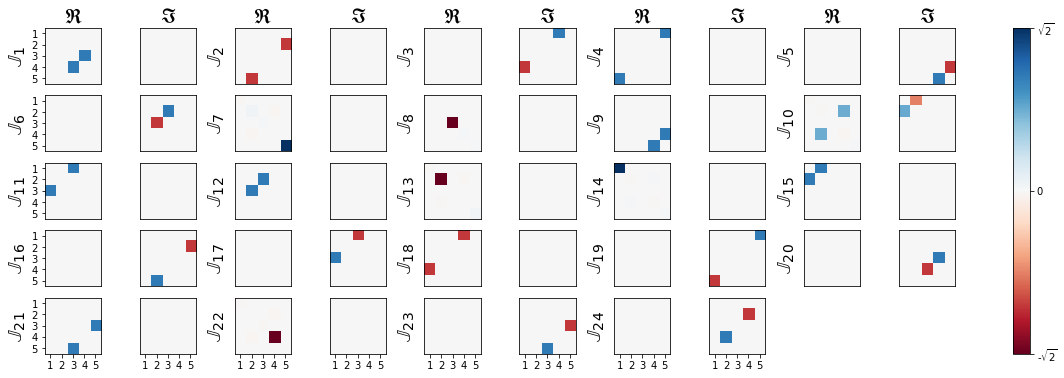

In [61]:
figsizeg =(24,6)
rows = 5
cols = 5*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [62]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [63]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [64]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)

---

# $U(6)$ and $SU(6)$: Figure 6: $n_{dim} = 6, n_{gen} = 36,35$

## $U(6)$: $n_{dim} = 6, n_{gen} = 36$

Epoch 20000   |  Train Loss: 1.1791017262872397
Total Time: 39331.93704200
Complete.


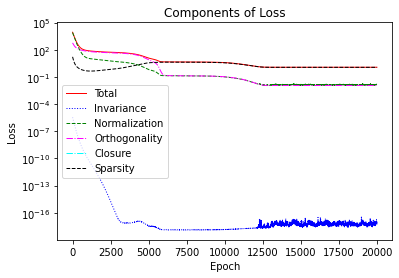

In [65]:
torch.manual_seed(0)
n       = 300
n_dim   = 6
n_gen   = 36
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 15000
oracle = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

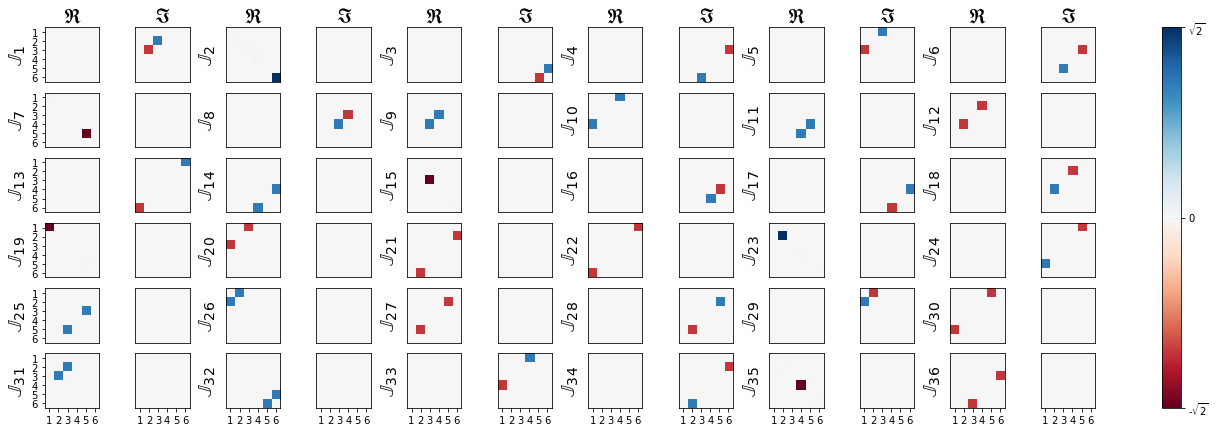

In [66]:
figsizeg = (24,7)
rows = 6
cols = 6*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [67]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [68]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [69]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)

## $SU(6)$: $n_{dim} = 6, n_{gen} = 35$

Epoch 20000   |  Train Loss: 1.1155922999143588
Total Time: 39502.11466217
Complete.


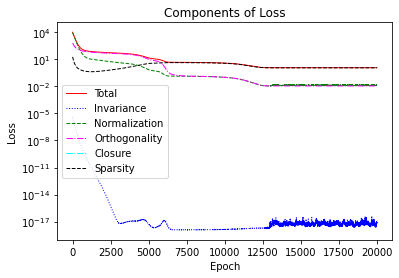

In [5]:
torch.manual_seed(0)
n       = 300
n_dim   = 6
n_gen   = 35
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 17000
oracle = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

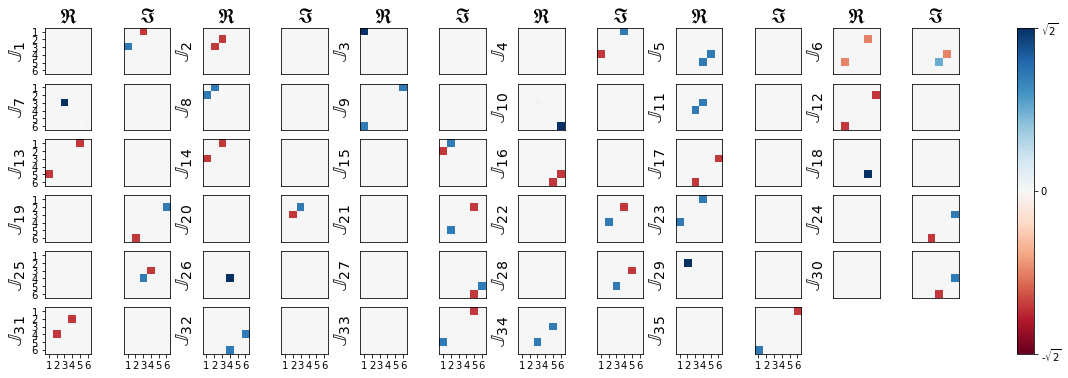

In [6]:
figsizeg = (24,6)
rows = 6
cols = 6*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [7]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [8]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [9]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)